In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import textwrap
import pickle

from matplotlib.lines import Line2D

In [18]:
def saveAsPDF(filename):
    # Save the plot as a PDF for LaTeX embedding
    output_pdf = f'/work3/s174159/LLM_Thesis/plots/img_pdf/{filename}.pdf'
    plt.savefig(output_pdf)
    print("Saved image")

In [19]:
relation_mapping = None
with (open("/work3/s174159/LLM_Thesis/class_mapping.pkl", "rb")) as openfile:
    relation_mapping = pickle.load(openfile)

if relation_mapping == None:
    raise ModuleNotFoundError

occurences = None
with (open("/work3/s174159/LLM_Thesis/class_occurrences.pkl", "rb")) as openfile:
    occurences = pickle.load(openfile)

if occurences == None:
    raise ModuleNotFoundError

def get_color_for_class(cls):
    try:
        match relation_mapping[cls.strip()]:
            case "both":
                return 'tab:green'
            case "sentence-based":
                return 'tab:blue'
            case "document-based":
                return 'tab:purple'
            case _:
                print(f"'{relation_mapping[cls.strip()]}' could not read correctly")
                raise ValueError
    except KeyError:
        # print(f"'{cls}' is not in relation_mapping, might be hallucination")
        return 'black'

def plot_data(data_filepath:os.PathLike, run_title:str, top:int=10):
    
    data = pd.read_csv(data_filepath)
    zero_data =data[data["f1"]==0]
    # zero_data
    data = data[data["f1"]!=0]

    best_worst_all = pd.concat([data[data["Class"] == "ALL"], data[data["Class"]!="ALL"].sort_values("f1").tail(top), data[data["Class"]!="ALL"].sort_values("f1").head(top)]).sort_values("f1")
    # best_worst_all
    species = wrapped_labels = [label for label in best_worst_all["Class"].to_list()]
    measurements = {
        "F1": best_worst_all["f1"].to_list(),
        "Precision": best_worst_all["p"].to_list(),
        "Recall": best_worst_all["r"].to_list()
    }

    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained',figsize=(10, 5))

    for attribute, measurement in measurements.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=0)
        # ax.bar_label(rects, padding=0)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score %')
    ax.set_title(f'{run_title} Top and Bottom 10 F1, Precision and Recall Scores')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0,100)
    plt.xticks(rotation=42, fontsize=8, ha="right", rotation_mode='anchor')
    for tick_label in ax.get_xticklabels():
        label_text = tick_label.get_text()
        if 'ALL' == label_text:  # Check if the label contains 'ALL'
            tick_label.set_fontweight('bold')  # Set font weight to bold
        else:
            tick_label.set_color(get_color_for_class(label_text))
    ax.axhline(16.5, lw=0.6, color="grey")
    ax.axhline(33.4, lw=0.6, color="grey")
    ax.axhline(50, lw=0.6, color="grey")
    ax.axhline(66.6, lw=0.6, color="grey")
    ax.axhline(83.5, lw=0.6, color="grey")

    ax.legend(handles=[Line2D([0], [0], color='tab:blue', lw=4, label="F1"),
                        Line2D([0], [0], color='tab:orange', lw=4, label="Precision"),
                        Line2D([0], [0], color='tab:green', lw=4, label="Recall"),
                        # Line2D([0], [0], color='black',marker='o', lw=4, color='w', label="Recall")
                        # Line2D([0], [0], marker='o', color='w', label='#of Occurences',
                        #   markerfacecolor='black', markersize=10)
                        ], loc='upper left', ncols=4, fontsize=10)

    # x = [i for i,cls in enumerate(best_worst_all["Class"]) if cls != "ALL"]
    # y = [occurences[best_worst_all["Class"].iloc[i]] for i in x]

    # ax2 = ax.twinx()
    # ax2.scatter(x,y, color="black", label="Number of occurences", zorder=4, s=60)  # s=60 adjusts the size of the dots
    # ax2.set_ylabel('Number of occurences', fontsize=14, color="black")
    # ax2.tick_params(axis='y', labelcolor="black")
    # # ax2.grid(True, which="both",axis="y", linestyle="-")

    # # Align the scales if necessary to avoid a visual shift in the y-axes
    
    # ax2.set_ylim(0, 6000)  # Since F1 score is between 0 and 1




    saveAsPDF(f'{run_title.replace(" ", "_")}_TOP_BOTTOM')
    plt.show()

    print("Classes with zero f1")

    return zero_data


Saved image


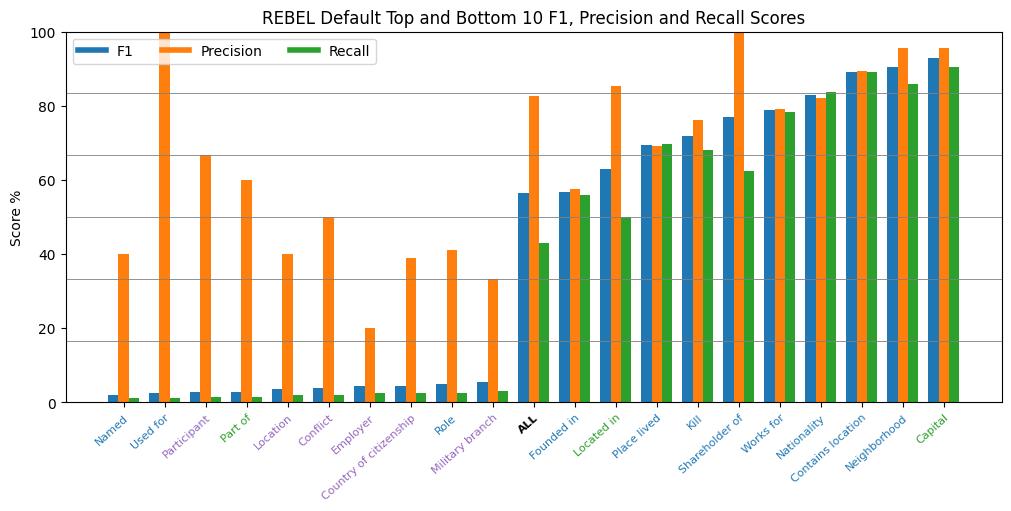

Classes with zero f1


,Class,tp,fp,fn,p,r,f1
2,Usage,0,2,54,0.0,0.0,0.0
4,Characters,0,0,44,0.0,0.0,0.0
5,Head of state,0,0,31,0.0,0.0,0.0
10,Product or material produced,0,0,4,0.0,0.0,0.0
12,Evaluate for,0,0,31,0.0,0.0,0.0
13,Production company,0,1,23,0.0,0.0,0.0
20,Official language,0,0,13,0.0,0.0,0.0
22,Subsidiary,0,0,19,0.0,0.0,0.0
23,Related to,0,2,145,0.0,0.0,0.0
24,Hyponym of,0,0,42,0.0,0.0,0.0


In [20]:
plot_data("/work3/s174159/LLM_Thesis/SOTA/REBEL/test/REBEL_DEFAULT/data.csv", "REBEL Default")

Saved image


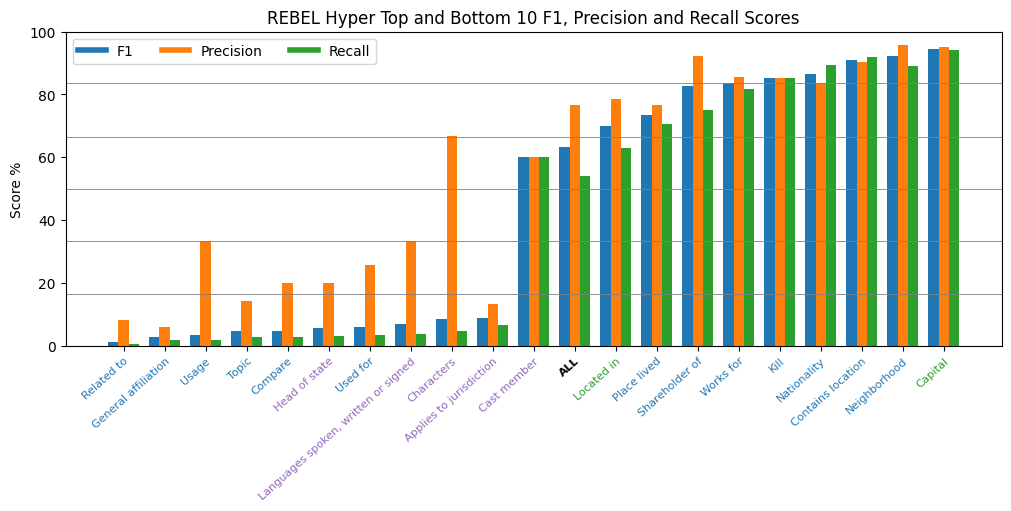

Classes with zero f1


,Class,tp,fp,fn,p,r,f1
10,Product or material produced,0,0,4,0.0,0.0,0.0
12,Evaluate for,0,1,31,0.0,0.0,0.0
26,Seperated from,0,0,1,0.0,0.0,0.0
28,Point in time,0,3,22,0.0,0.0,0.0
35,Subclass of,0,0,14,0.0,0.0,0.0
38,Replaced by,0,0,5,0.0,0.0,0.0
39,Parent organization,0,0,17,0.0,0.0,0.0
40,Work location,0,1,21,0.0,0.0,0.0
48,Chairperson,0,0,10,0.0,0.0,0.0
52,Conjunction,0,5,49,0.0,0.0,0.0


In [21]:
plot_data("/work3/s174159/LLM_Thesis/SOTA/REBEL/test/REBEL_HYPER/data.csv", "REBEL Hyper")

In [22]:
# plot_data("/work3/s174159/LLM_Thesis/SOTA/REBEL/test/BART_HYPER/data.csv", "BART Hyper")

Saved image


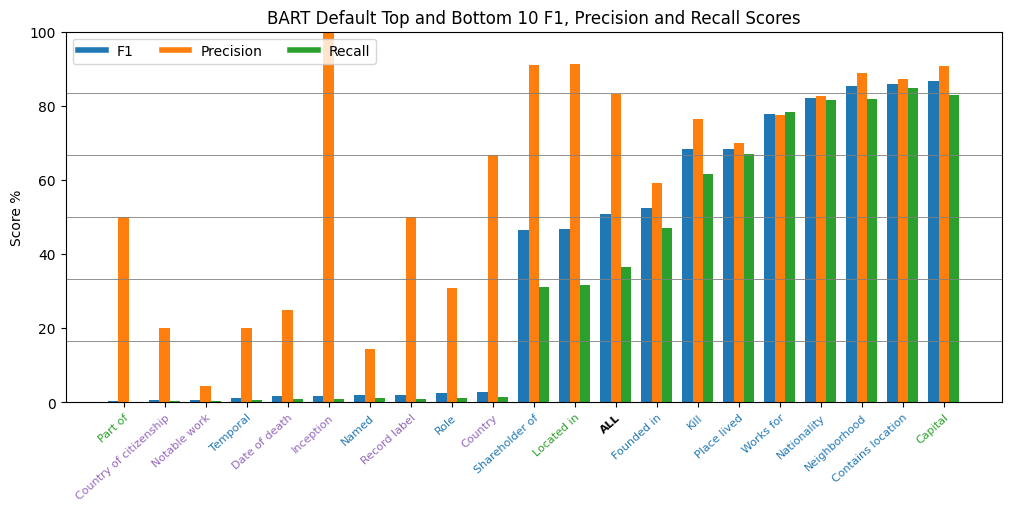

Classes with zero f1


,Class,tp,fp,fn,p,r,f1
1,Has part,0,0,211,0.0,0.0,0.0
2,Usage,0,0,54,0.0,0.0,0.0
3,Award received,0,0,45,0.0,0.0,0.0
4,Characters,0,0,44,0.0,0.0,0.0
5,Head of state,0,0,31,0.0,0.0,0.0
...,...,...,...,...,...,...,...
110,Mouth of the watercourse,0,0,17,0.0,0.0,0.0
111,Developer,0,0,49,0.0,0.0,0.0
112,Position held,0,0,3,0.0,0.0,0.0
116,End time,0,0,12,0.0,0.0,0.0


In [23]:
plot_data("/work3/s174159/LLM_Thesis/SOTA/REBEL/test/BART_DEFAULT/data.csv", "BART Default")